# Trabajo Práctico Final - Curso Data Science - Coder House

#### Empresa / Organización / Problema Específico
Predicción de retrasos en la aviación comercial en Estados Unidos.

#### Objetivo de la Investigación

Mejorar los servicios prestados a los pasajeros mediante la predicción de retrasos; conociendo la aerolinea que opera el vuelo, el día de la semana en la que está programado, su aeropuerto de origen y aeropuerto destino.

#### Equipo
El equipos se encuentra conformado por:
* Iván Arango 
* Natalia Johansen 
* Ignacio Piana


#### Fuente de datos
El dataset a utilizar se obtuvo de Kaggle --> https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

Se seleccionó este dataset en base a la cantidad de registros y variables disponibles, así como la posibilidad de trabajar con un problema de negocio que nos resultara pertinente en la actualidad y acorde a nuestros intereses particulares. En la actualidad, los principales aeropuertos de todo el mundo se encuentran experimentando una situación cercana al colapso principalmente debido a la falta de recursos y de personal calificado (como pilotos, controladores aéreos, personal de seguridad, personal de logística, etc.). A raíz de los confinamientos aplicados por el avance de la COVID-19, tanto aerolíneas como aeropuertos aplicaron fuertes recortes de personal por la falta de actividad dentro del sector. Tras el ocaso de la pandemia, la demanda se incrementó exponencialmente y la industria de la aviación comercial no logra ponerse al día y los cuellos de botella en la operación ya son moneda corriente. Las consecuencias de esta crisis impactarán de lleno en perjuicio de los usuarios porque este desequilibrio entre oferta y demanda conduce a la reducción de rutas y frecuencias, cancelaciones y un incremento en los precios de los pasajes.  

#### Objetivo de los datos
Aspiramos a que este conjunto de datos nos permita encontrar correlaciones entre las diferentes variables disponibles para predecir aquellas aerolíneas, rutas aéreas y/o aeropuertos dónde los pasajeros serán más propensos a sufrir retrasos en sus vuelos.

El objetivo que establecimos es utilizar el 70% de los datos para entrenar el modelo, y el 30% restante para testearlo.

## Data acquisition - Airlines

### 1. Carga de datos 

In [1]:
# Importamos librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# Lectura del csv de Aerolineas y Vuelos
df_air = pd.read_csv('Airlines.csv', sep=',')
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


**Data Features - Airlines.csv**

1. **Airline:** Diferentes tipos de aerolineas comerciales
2. **Flight:** Número de Vuelo
3. **Airport From:** Aeropuesto de salida
4. **Airport To:** Aeropuerto de llegada
5. **DayOfWeek:** Día de la semana en el que se realiza el vuelo
6. **Time:** Horario de partida del vuelo (en minutos)
7. **Length:** Duración del vuelvo (en minutos)
8. **Delay:** booleano si el vuelo tuvo demoras o no

In [3]:
# Lectura del csv de Aeropuertos
df_airport = pd.read_csv('Airports.csv', sep=';')
df_airport.head()

,Airport,Cod_Airport,Desc_Airport,Loc
0,ATL - Hartsfield-Jackson Atlanta International...,ATL,Hartsfield-Jackson Atlanta International Airport,Georgia
1,AUS - Austin-Bergstrom International Airport -...,AUS,Austin-Bergstrom International Airport,Texas
2,BNA - Nashville International Airport - Tennessee,BNA,Nashville International Airport,Tennessee
3,BOS - Boston Logan International Airport - Mas...,BOS,Boston Logan International Airport,Massachusetts
4,BWI - Baltimore-Washington International Thurg...,BWI,Baltimore-Washington International Thurgood Ma...,Washington


**Data Features - Airports.csv**

1. **Airport:** Nombre completo del aeropuerto
2. **Cod_Airport:** Código de identificacion del aeropuerto
3. **Desc_Airport:** Nombre corto del Aeropuerto
4. **Loc:** Localización del Aeropuerto

### 2. Explorando los datos

In [4]:
# Qué tamaño tienen los datos?
df_air.shape

(539383, 9)

In [5]:
# Hay valores nulos en los datos?
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
# Como se distribuyen las variables numéricas
df_air.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [7]:
# Como se comportan las variables categóricas
df_air.describe(include=['O'])

,Airline,AirportFrom,AirportTo
count,539383,539383,539383
unique,18,293,293
top,WN,ATL,ATL
freq,94097,34449,34440


*Resumen de los datos:*

Los datos se relacionan con la industria de la aviación comercial estadounidese. 
Contamos con 539.383 observaciones y 6 variables.
También resulta importante mencionar que no tenemos valores faltantes en nuestro dataset.

#### 2.1 Data Wrangling

En la distribución de las variables númericas hemos identificado que existen vuelos con distancia 0 (Length = 0). Procedemos a eliminar estos registros 

In [8]:
df_air.drop(df_air[df_air.Length == 0].index, inplace=True)
df_air.shape

(539379, 9)

In [9]:
#Pasamos las columnas Time y Length de minutos a horas para facilitar su interpretación
df_air['Time'] = df_air['Time'].div(60).round(2)
df_air['Length'] = df_air['Length'].div(60).round(2)

In [10]:
# Volvemos a ver la distribución de las variables númericas para armar agrupaciones en base a los cuartiles. 
df_air.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539379.000000,539379.000000,539379.000000,539379.000000,539379.000000,539379.000000
mean,269692.152479,2427.945135,3.929649,13.378789,2.203352,0.445444
std,155706.865117,2067.428568,1.914658,4.634079,1.168602,0.497015
min,1.000000,1.000000,1.000000,0.170000,0.380000,0.000000
25%,134845.500000,712.000000,2.000000,9.420000,1.350000,0.000000
50%,269693.000000,1809.000000,4.000000,13.250000,1.920000,0.000000
75%,404537.500000,3745.000000,5.000000,17.250000,2.700000,1.000000
max,539383.000000,7814.000000,7.000000,23.980000,10.920000,1.000000


Realizamos agrupaciones para las columnas Time y Length.
Esto nos permitirá realizar visualizaciones menos cargadas y poder interpretar mejor los datos.

In [11]:
#Agrupación Time (Horario de partida)
df_air.loc[df_air['Time'] <= 9.42, 'TimeGroups'] = 'Mañana'
df_air.loc[df_air['Time'].between(9.42, 13.26, inclusive='neither'), 'TimeGroups'] = 'Mediodia'
df_air.loc[df_air['Time'].between(13.25, 17.26, inclusive='neither'), 'TimeGroups'] = 'Tarde'
df_air.loc[df_air['Time'] > 17.25, 'TimeGroups'] = 'Noche'

In [12]:
#Agrupación Length (Duración)
df_air.loc[df_air['Length'] <= 1.35, 'LengthGroups'] = '<= 1.35'
df_air.loc[df_air['Length'].between(1.35, 1.93, inclusive='neither'),  'LengthGroups'] = '1.36 - 1.92'
df_air.loc[df_air['Length'].between(1.92, 2.71, inclusive='neither'),  'LengthGroups'] = '1.93 - 2.70'
df_air.loc[df_air['Length'] > 2.71, 'LengthGroups'] = '>= 2.71'
df_air

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups
0,1,CO,269,SFO,IAH,3,0.25,3.42,1,Mañana,>= 2.71
1,2,US,1558,PHX,CLT,3,0.25,3.70,1,Mañana,>= 2.71
2,3,AA,2400,LAX,DFW,3,0.33,2.75,1,Mañana,>= 2.71
3,4,AA,2466,SFO,DFW,3,0.33,3.25,1,Mañana,>= 2.71
4,5,AS,108,ANC,SEA,3,0.50,3.37,0,Mañana,>= 2.71
...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,23.98,5.43,0,Noche,>= 2.71
539379,539380,FL,398,SEA,ATL,5,23.98,5.08,0,Noche,>= 2.71
539380,539381,FL,609,SFO,MKE,5,23.98,4.25,0,Noche,>= 2.71
539381,539382,UA,78,HNL,SFO,5,23.98,5.22,1,Noche,>= 2.71


Incorporamos al dataset información sobre los aeropuertos

Merge Aeropuertos Origen

In [13]:
# Merge Aeropuertos Origen
df_air = pd.merge(df_air, df_airport, how='left', left_on='AirportFrom', right_on='Cod_Airport')
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups,Airport,Cod_Airport,Desc_Airport,Loc
0,1,CO,269,SFO,IAH,3,0.25,3.42,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California
1,2,US,1558,PHX,CLT,3,0.25,3.70,1,Mañana,>= 2.71,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona
2,3,AA,2400,LAX,DFW,3,0.33,2.75,1,Mañana,>= 2.71,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California
3,4,AA,2466,SFO,DFW,3,0.33,3.25,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California
4,5,AS,108,ANC,SEA,3,0.50,3.37,0,Mañana,>= 2.71,NaN,NaN,NaN,NaN


In [14]:
# Renombramos columnas
df_air.rename(columns={"Airport":"Airport_From", "Cod_Airport":"Cod_AirportFrom", "Desc_Airport":"Desc_AirportFrom", "Loc":"Loc_From"}, inplace=True)
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups,Airport_From,Cod_AirportFrom,Desc_AirportFrom,Loc_From
0,1,CO,269,SFO,IAH,3,0.25,3.42,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California
1,2,US,1558,PHX,CLT,3,0.25,3.70,1,Mañana,>= 2.71,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona
2,3,AA,2400,LAX,DFW,3,0.33,2.75,1,Mañana,>= 2.71,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California
3,4,AA,2466,SFO,DFW,3,0.33,3.25,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California
4,5,AS,108,ANC,SEA,3,0.50,3.37,0,Mañana,>= 2.71,NaN,NaN,NaN,NaN


Merge Aeropuertos Destinos

In [15]:
# Merge Aeropuertos Destinos
df_air = pd.merge(df_air, df_airport, how='left', left_on='AirportTo', right_on='Cod_Airport')
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups,Airport_From,Cod_AirportFrom,Desc_AirportFrom,Loc_From,Airport,Cod_Airport,Desc_Airport,Loc
0,1,CO,269,SFO,IAH,3,0.25,3.42,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,IAH - George Bush Intercontinental Airport - H...,IAH,George Bush Intercontinental Airport,"Houston, Texas"
1,2,US,1558,PHX,CLT,3,0.25,3.70,1,Mañana,>= 2.71,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona,CLT - Charlotte Douglas International Airport ...,CLT,Charlotte Douglas International Airport,North Carolina
2,3,AA,2400,LAX,DFW,3,0.33,2.75,1,Mañana,>= 2.71,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
3,4,AA,2466,SFO,DFW,3,0.33,3.25,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
4,5,AS,108,ANC,SEA,3,0.50,3.37,0,Mañana,>= 2.71,NaN,NaN,NaN,NaN,SEA - Seattle–Tacoma International Airport - W...,SEA,Seattle–Tacoma International Airport,Washington


In [16]:
# Renombramos columnas
df_air.rename(columns={"Airport":"Airport_To", "Cod_Airport":"Cod_AirportTo", "Desc_Airport":"Desc_AirportTo", "Loc":"Loc_To"}, inplace=True)
df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups,Airport_From,Cod_AirportFrom,Desc_AirportFrom,Loc_From,Airport_To,Cod_AirportTo,Desc_AirportTo,Loc_To
0,1,CO,269,SFO,IAH,3,0.25,3.42,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,IAH - George Bush Intercontinental Airport - H...,IAH,George Bush Intercontinental Airport,"Houston, Texas"
1,2,US,1558,PHX,CLT,3,0.25,3.70,1,Mañana,>= 2.71,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona,CLT - Charlotte Douglas International Airport ...,CLT,Charlotte Douglas International Airport,North Carolina
2,3,AA,2400,LAX,DFW,3,0.33,2.75,1,Mañana,>= 2.71,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
3,4,AA,2466,SFO,DFW,3,0.33,3.25,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
4,5,AS,108,ANC,SEA,3,0.50,3.37,0,Mañana,>= 2.71,NaN,NaN,NaN,NaN,SEA - Seattle–Tacoma International Airport - W...,SEA,Seattle–Tacoma International Airport,Washington


Reemplazamos los valores "NaN" por "Other", valor que va a representar aquellos aeropuestos que no se encontraban en el dataset mergeado.  

In [17]:
df_air['Cod_AirportFrom'].fillna("Other", inplace=True)
df_air['Cod_AirportTo'].fillna("Other", inplace=True)
df_air['Loc_From'].fillna("Other", inplace=True)
df_air['Loc_To'].fillna("Other", inplace=True)

df_air.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,TimeGroups,LengthGroups,Airport_From,Cod_AirportFrom,Desc_AirportFrom,Loc_From,Airport_To,Cod_AirportTo,Desc_AirportTo,Loc_To
0,1,CO,269,SFO,IAH,3,0.25,3.42,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,IAH - George Bush Intercontinental Airport - H...,IAH,George Bush Intercontinental Airport,"Houston, Texas"
1,2,US,1558,PHX,CLT,3,0.25,3.70,1,Mañana,>= 2.71,PHX - Phoenix Sky Harbor International Airport...,PHX,Phoenix Sky Harbor International Airport,Arizona,CLT - Charlotte Douglas International Airport ...,CLT,Charlotte Douglas International Airport,North Carolina
2,3,AA,2400,LAX,DFW,3,0.33,2.75,1,Mañana,>= 2.71,LAX - Los Angeles International Airport - Cali...,LAX,Los Angeles International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
3,4,AA,2466,SFO,DFW,3,0.33,3.25,1,Mañana,>= 2.71,SFO - San Francisco International Airport - Ca...,SFO,San Francisco International Airport,California,DFW - Dallas/Fort Worth International Airport ...,DFW,Dallas/Fort Worth International Airport,Texas
4,5,AS,108,ANC,SEA,3,0.50,3.37,0,Mañana,>= 2.71,NaN,Other,NaN,Other,SEA - Seattle–Tacoma International Airport - W...,SEA,Seattle–Tacoma International Airport,Washington


#### 2.2 Análisis Univariado

In [18]:
# Analisis de Vuelos
un_flight = df_air['Flight'].unique()
print(len(un_flight))

6585


El dataset cuenta con 6585 vuelos unicos

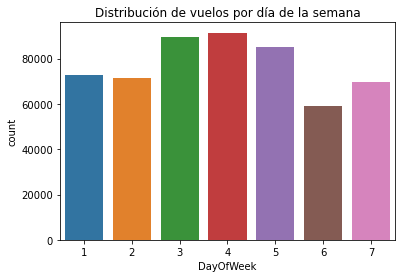

In [19]:
# Analisis Días de la semana
fig, ax = plt.subplots()
ax = sns.countplot(x='DayOfWeek', data=df_air)
ax.set(title='Distribución de vuelos por día de la semana')
plt.show()

En esta visualización podemos ver como el día 6 (sábado) y 7 (domingo) son los días que menos vuelos tienen, lo que tiene sentido ya que no son días que se suela viajar para vacacionar, o de forma empresarial.
Como segundo grupo esta el día 1 (lunes) y 2 (martes) y el grupo con mayor cantidad de vuelos se encuentra en la mitad de la semana con los días 3 (miercoles), 4 (jueves) y 5 (viernes).

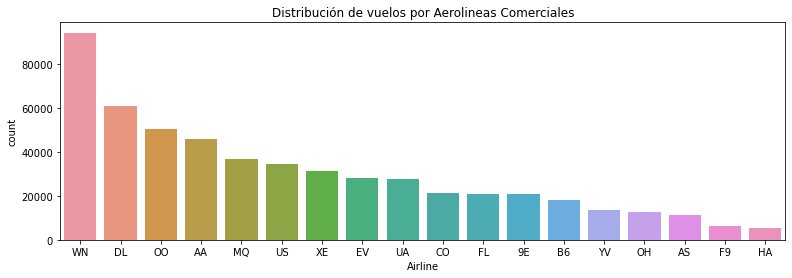

In [20]:
# Analisis Aerolineas
plt.figure(figsize=(13, 4))
sns.countplot(x='Airline', data=df_air, order = df_air.Airline.value_counts().index)
plt.title('Distribución de vuelos por Aerolineas Comerciales')
plt.show()

En esta visualización podemos ver las aerolíneas que más vuelos tienen de forma decreciente.

**Diccionario de Aerolineas (según fuente de origen en KAGGLE):**
- Alaska Airlines AS / ASA
- American Airlines AA/AAL
- Air Canada AC/AC
- Aeromexico AM / AMX
- Continental Airlines CO / COA
- Delta Airlines DL / DAL
- FedEx FX / FDX
- Hawaiian Airlines HA / HAL
- Northwest Airlines NW / NWA
- Polar Air Cargo PO / PAC
- Southwest Airlines SW / SWA
- United Airlines UA / UAL
- United Parcel (UPS) 5X / UPS
- Virgin Atlantic VS / VIR
- VivaAerobús VB / VIV
- WestJet WS / WJ

<AxesSubplot:>

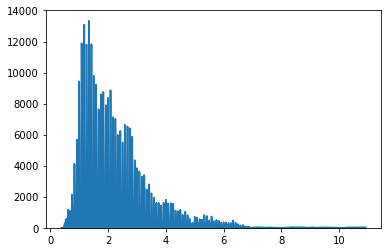

In [21]:
# Análisis de Distancia
df_air['Length'].value_counts().sort_index().plot.area()

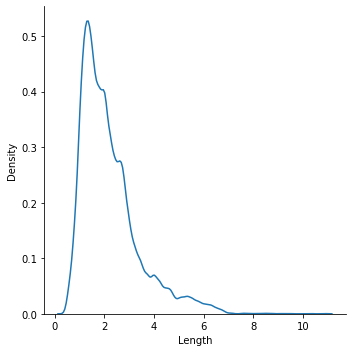

In [22]:
sns.displot(x='Length', data=df_air, kind="kde")

La variable 'Length' cuenta con una distribución "Asimétrica hacia la izquierda".
A su vez, evidencia que la duración de los vuelos se concentraron entre 0.5 y 3 horas. Con un valor mínimo de 0 y un máximo de 10.92. 
En total, 4 registros contaban con una duración igual a cero, por lo que decidimos excluirlos del análisis.

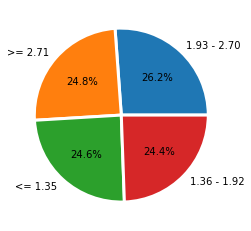

In [23]:
# Distribucion de agrupacián de Duración
lgroup = df_air['LengthGroups'].value_counts()
plt.pie(lgroup, autopct='%1.1f%%', 
       wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
        labels=lgroup.index)
plt.show()

La distribución de la cantidad de vuelos, en base a la duración, es bastante equitativa a lo largo de las 4 agrupaciones realizadas.

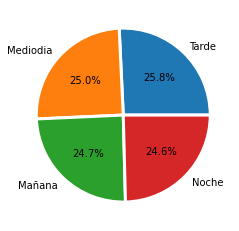

In [24]:
# Distribucion de agrupacián de Horario de Partida
tgroup = df_air['TimeGroups'].value_counts()
plt.pie(tgroup, autopct='%1.1f%%', 
       wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
        labels=tgroup.index)
plt.show()

La distribución de la cantidad de vuelos, en base al horario de partida, es bastante equitativa a lo largo de las 4 agrupaciones realizadas.

#### 2.3 Correlación de variables

In [25]:
df_air.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay', 'TimeGroups', 'LengthGroups', 'Airport_From',
       'Cod_AirportFrom', 'Desc_AirportFrom', 'Loc_From', 'Airport_To',
       'Cod_AirportTo', 'Desc_AirportTo', 'Loc_To'],
      dtype='object')

<AxesSubplot:>

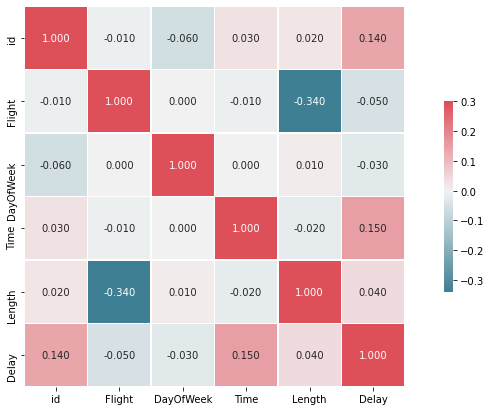

In [26]:
correlation = df_air.corr().round(2)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt =".3f")

Podemos observar que no hay fuertes correlaciones entre las variables.

#### 2.4 Estudio de la variable Target --> "Delay"

In [27]:
# Distribución de Retrasos
df_air.groupby(['Delay']).count()['id']

Delay
0    299116
1    240263
Name: id, dtype: int64

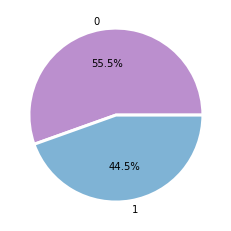

In [28]:
Delays = df_air['Delay'].value_counts()
plt.pie(Delays, colors=['#BB8FCE', '#7FB3D5'], autopct='%1.1f%%', 
       wedgeprops={"linewidth": 3, "edgecolor": "white"}, 
        labels=Delays.index)
plt.show()

Podemos ver que el 44.5% de los vuelos salieron retrasados.

In [29]:
# Delay vs Airline
df_air.groupby(['Delay','Airline']).count()['id']

Delay  Airline
0      9E         12460
       AA         27920
       AS          7579
       B6          9653
       CO          9161
       DL         33488
       EV         16728
       F9          3554
       FL         14552
       HA          3792
       MQ         23863
       OH          9128
       OO         27494
       UA         18673
       US         22909
       WN         28440
       XE         19331
       YV         10391
1      9E          8226
       AA         17736
       AS          3892
       B6          8458
       CO         11957
       DL         27452
       EV         11255
       F9          2899
       FL          6275
       HA          1786
       MQ         12742
       OH          3502
       OO         22760
       UA          8946
       US         11591
       WN         65657
       XE         11795
       YV          3334
Name: id, dtype: int64

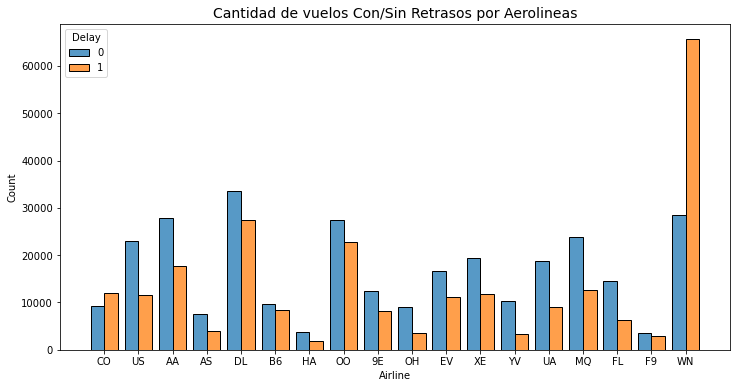

In [30]:
plt.figure(figsize = (12,6))
sns.histplot(data=df_air, x = df_air['Airline'], hue=df_air['Delay'], multiple="dodge", shrink=.8) 
plt.title('Cantidad de vuelos Con/Sin Retrasos por Aerolineas', fontsize = 14)
plt.show()

Acá podemos ver que la aerolinea WN si bien es la que mayor cantidad de vuelos realiza, también es la que peor servicio ofrece en cuanto a la puntualidad de los horarios de partida. Teniendo más del doble de vuelos retrasados que vuelos puntuales.
A su vez, junto con WN, CO es la única otra compañia que tiene más vuelos retrasados que puntuales.

In [31]:
df_aux = df_air.groupby(['Airline', 'Delay'])['id'].count().rename('%Delay_Airline').groupby(level = 0).transform(lambda x: (x/x.sum())*100).round(2)
df_aux

Airline  Delay
9E       0        60.23
         1        39.77
AA       0        61.15
         1        38.85
AS       0        66.07
         1        33.93
B6       0        53.30
         1        46.70
CO       0        43.38
         1        56.62
DL       0        54.95
         1        45.05
EV       0        59.78
         1        40.22
F9       0        55.08
         1        44.92
FL       0        69.87
         1        30.13
HA       0        67.98
         1        32.02
MQ       0        65.19
         1        34.81
OH       0        72.27
         1        27.73
OO       0        54.71
         1        45.29
UA       0        67.61
         1        32.39
US       0        66.40
         1        33.60
WN       0        30.22
         1        69.78
XE       0        62.11
         1        37.89
YV       0        75.71
         1        24.29
Name: %Delay_Airline, dtype: float64

En 16 de las 18 aerolíneas la cantidad de vuelos sin retrasos es superior a la cantidad de vuelos con retrasos. Llamativamente, encontramos la situación inversa en WN, la aerolínea con mayor cantidad de vuelos, y en CO, una de las aerolíneas con menor cantidad de vuelos registrados.

In [32]:
# Delay vs DayOfWeek
df_air.groupby(['Delay','DayOfWeek']).count()['id']

Delay  DayOfWeek
0      1            38739
       2            39427
       3            47492
       4            50201
       5            49733
       6            35339
       7            38185
1      1            34030
       2            31913
       3            42254
       4            41244
       5            35515
       6            23615
       7            31692
Name: id, dtype: int64

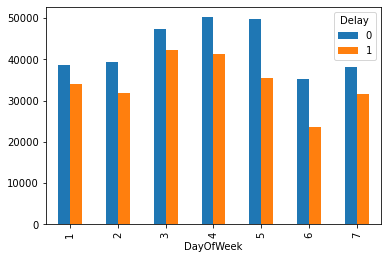

In [33]:
group_day = df_air.groupby(['Delay','DayOfWeek']).count()['id']
(group_day.unstack(level=0).plot.bar())
plt.show()

En esta visualización podemos ver que el día de la semana no tiene una gran influencia sobre los retrasos en los vuelos. 

In [34]:
df_aux2 = df_air.groupby(['DayOfWeek', 'Delay'])['id'].count().rename('%Delay_DayOfWeek').groupby(level = 0).transform(lambda x: (x/x.sum())*100).round(2)
df_aux2

DayOfWeek  Delay
1          0        53.24
           1        46.76
2          0        55.27
           1        44.73
3          0        52.92
           1        47.08
4          0        54.90
           1        45.10
5          0        58.34
           1        41.66
6          0        59.94
           1        40.06
7          0        54.65
           1        45.35
Name: %Delay_DayOfWeek, dtype: float64

Analizando los retrasos por día de la semana no se ha identificado ninguna diferencia significativa. Todos cuentan con aproximadamente entre un 40 y 47% de vuelos retrasados.

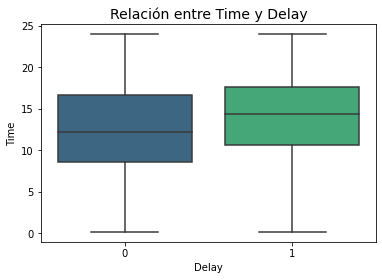

In [35]:
# Delay vs Time
#plt.figure(figsize = (8,6))
sns.boxplot( x=df_air['Delay'], y=df_air['Time'], palette = 'viridis')
plt.title('Relación entre Time y Delay', fontsize = 14)
plt.show()

Según el resultado del boxplot se podría evidenciar una ligera tendencia de que los vuelos con retrasos suelen tener un horario de partida un poco más tarde que los vuelos sin retrasos. Sin embargo no es evidencia suficiente para tal afirmación y se deberia realizar un test de hipotesis para su confirmación.

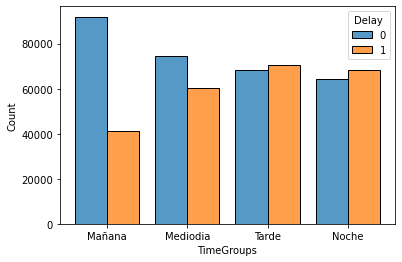

In [36]:
# Delay vs TimeGroups
sns.histplot(data=df_air, x = df_air['TimeGroups'], hue=df_air['Delay'], multiple="dodge", shrink=.8) 
plt.show()

Podemos ver claramente que mientras más tarde es el horario de salida, más probabilidades hay de que el vuelo este retrasado.

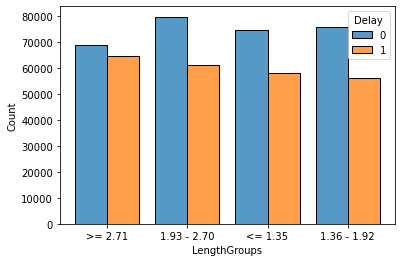

In [37]:
# Delay vs LengthGroups 
sns.histplot(data=df_air, x = df_air['LengthGroups'], hue=df_air['Delay'], multiple="dodge", shrink=.8) 
plt.show()

Podemos ver que los vuelos de una duración larga (Mayor a 2.71 horas) suelen tener mayor probabilidad de retraso que las otras 3 agrupaciones.

#### 2.5 Análisis Multivariado

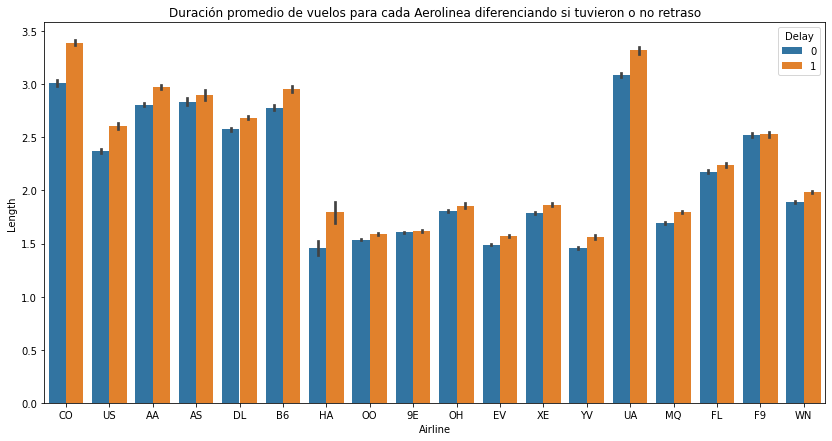

In [38]:
%matplotlib inline
plt.figure(figsize = (14,7))
sns.barplot(x = df_air['Airline'], y = df_air['Length'], hue=df_air['Delay']) 
plt.title('Duración promedio de vuelos para cada Aerolinea diferenciando si tuvieron o no retraso')
plt.show()

El gráfico de barra calcula el promedio de campo "Length" por aerolinea diferenciando aquellos que presentaron retrasos versus aquellos que no.

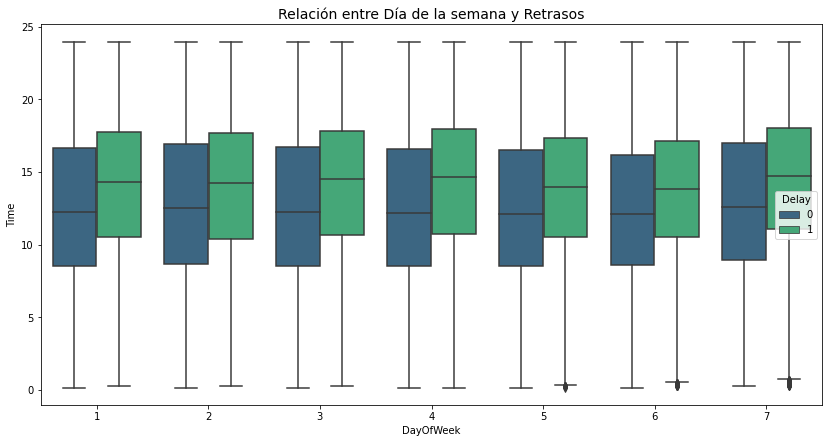

In [39]:
plt.figure(figsize = (14,7))
sns.boxplot( x=df_air['DayOfWeek'], y=df_air['Time'], hue=df_air['Delay'], palette = 'viridis')
plt.title('Relación entre Día de la semana y Retrasos', fontsize = 14)
plt.show()

El boxplot muestra la relación entre días de la semana, el tiempo y la existencia (o inexistencia) de retrasos. Decidimos hacer este análisis partiendo del anterior boxplot planteado ("Relación entre Time y Delay") para detectar posibles variaciones entre los días de la semana.

Agrupamos "Delay" segun AirportFrom and AirportTo

Creamos nuevo dataframe con el resultado de la agrupación